In [13]:
import matplotlib.pyplot as plt
import numpy as np
import veloxchem as vlx
from scipy.interpolate import interp1d
import py3Dmol as p3d
from matplotlib import gridspec


# Conversion factor
au2ev = 27.211386

# ==== 1. Define molecule ====
smiles = "O=C1OC(C2=C1C=CC=C2)(C3=CC=C(C=C3)O[H])C4=CC=C(C=C4)O[H]"
phen = vlx.Molecule.read_smiles(smiles)

phen.show()

basis = vlx.MolecularBasis.read(phen, 'def2-svp')

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.filename = 'mol-opt'
scf_drv.xcfun = 'cam-b3lyp'
scf_drv.dispersion = True

opt_drv = vlx.OptimizationDriver(scf_drv)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
opt_mol = vlx.Molecule.read_xyz(opt_results["xyz"])

AttributeError: 'list' object has no attribute 'strip'

In [14]:
opt_results = vlx.read_results("./mol-opt.h5", label="opt")
opt_drv.show_convergence(opt_results)

interactive(children=(IntSlider(value=19, description='step', max=19), Output()), _dom_classes=('widget-intera…

In [18]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.xcfun = 'CAM-B3LYP'
scf_results = scf_drv.compute(phen, basis)

rsp_drv = vlx.lreigensolver.LinearResponseEigenSolver()
rsp_drv.nstates = 6
rsp_drv.filename = 'mol2-rsp'
rsp_results = rsp_drv.compute(phen, basis, scf_results)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

Energy [au]  Osc. str.   TM(x)     TM(y)     TM(z)
   271.925      0.00015  -0.03292  -0.01657  -0.00344
   252.311      0.03481   0.15436   0.29574  -0.42165
   243.193      0.03622  -0.51114  -0.08795   0.14481
   241.014      0.02522  -0.02364  -0.34582   0.28268
   233.011      0.02793   0.06886  -0.18326   0.41940
   225.458      0.04306   0.19202   0.21339   0.48696


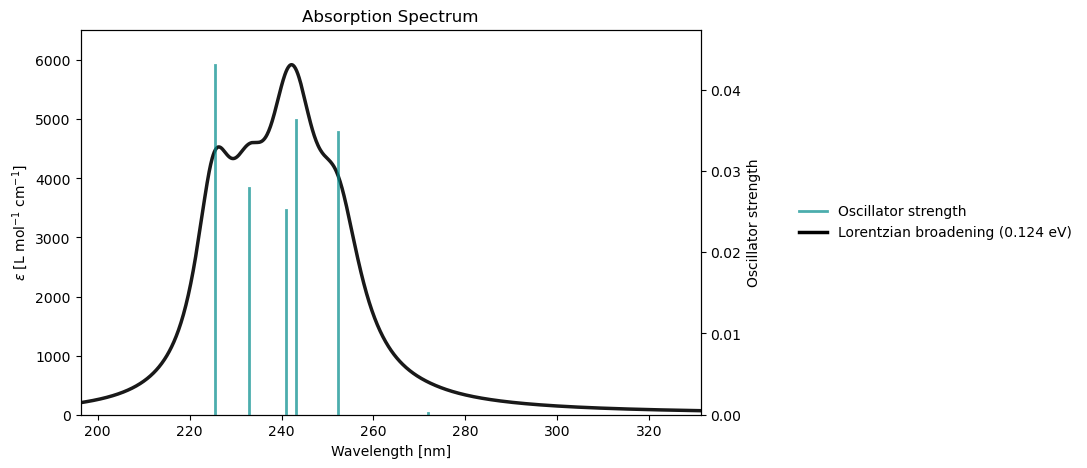

In [19]:
au2ev = 27.211386

# Print results as a table
print("Energy [au]  Osc. str.   TM(x)     TM(y)     TM(z)")
for i in np.arange(len(rsp_results["eigenvalues"])):
    e, os, x, y, z = (
        rsp_results["eigenvalues"][i],
        rsp_results["oscillator_strengths"][i],
        rsp_results["electric_transition_dipoles"][i][0],
        rsp_results["electric_transition_dipoles"][i][1],
        rsp_results["electric_transition_dipoles"][i][2],
    )
    print("   {:.3f}     {:8.5f}  {:8.5f}  {:8.5f}  {:8.5f}".format(1240/(e* au2ev), os, x, y, z))

rsp_drv.plot(rsp_results, plot_type="uv")